In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
a = Path("data/redditconflict_test.parquet")
df = pd.read_parquet(a)
df.head()

,Index,text,sentiment,sentiment-summary,sentiment-keyphrases
0,1.0,&gt;About the kidnapped Palestinian civilians....,Pro-Palestine,"This Reddit post engages in a heated debate, p...","Hamas under Shifa hospital, Israeli settlers b..."
1,2.0,Not really. The reason why I used the US havin...,Neutral,This Reddit post draws a parallel between the ...,"US border control, Egypt Rafah comparison, mai..."
2,3.0,Bibi saying Israel will invade Rafah regardles...,Pro-Palestine,This Reddit post expresses concern over Israel...,"Rafah invasion, Netanyahu's decision, potentia..."
3,4.0,Maybe if they had open elections? Aside from H...,Pro-Palestine,This post argues that support for Hamas among ...,"Hamas as only option, Israeli oppression of Ga..."
4,5.0,"For israel, it worth the entire world, we trea...",Pro-Israel,This post strongly defends Israel's actions in...,"Pro-Israel, Iron Sword Operation, Hamas as ter..."


In [ ]:
# load dataset
train_dataset_path = Path("data/train_data.csv")
test_dataset_path = Path("data/test_data.csv")
val_dataset_path = Path("data/val_data.csv")
train_df = pd.read_csv(train_dataset_path)
test_df = pd.read_csv(test_dataset_path)
val_df = pd.read_csv(val_dataset_path)

test_df = pd.concat([test_df, val_df], ignore_index=True)

In [8]:
# rename columns
train_df = train_df.rename(columns={"self_text": "text", "Sentiment": "sentiment"})
test_df = test_df.rename(columns={"self_text": "text", "Sentiment": "sentiment"})

# drop columns
train_df.drop(columns=["Unnamed: 0", "created_time"], inplace=True)
test_df.drop(columns=["Unnamed: 0", "created_time"], inplace=True)

In [9]:
train_df.head()

,text,sentiment
0,"Armed, masked men in Gaza have started patrols...",Pro-Palestine
1,They also had upscale malls and grocery stores...,Neutral
2,"Agreed. I always hated the government, they di...",Pro-Palestine
3,thank you ðð¼ðð¼ðð¼ we really n...,Pro-Palestine
4,Assessment in Israel: The US will support a ma...,Pro-Israel


In [4]:
train_df.value_counts("Sentiment")

Sentiment
Pro-Israel       3097
Pro-Palestine    2146
Neutral          1735
Name: count, dtype: int64

In [5]:
test_df.value_counts("Sentiment")

Sentiment
Pro-Israel       1315
Pro-Palestine     921
Neutral           755
Name: count, dtype: int64

In [11]:
def plot_column_distribution(dataframe, column_name):
    """
    Plots the distribution of a specified column in the DataFrame.
    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.countplot(data=dataframe, x=column_name, order=dataframe[column_name].value_counts().index)
    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

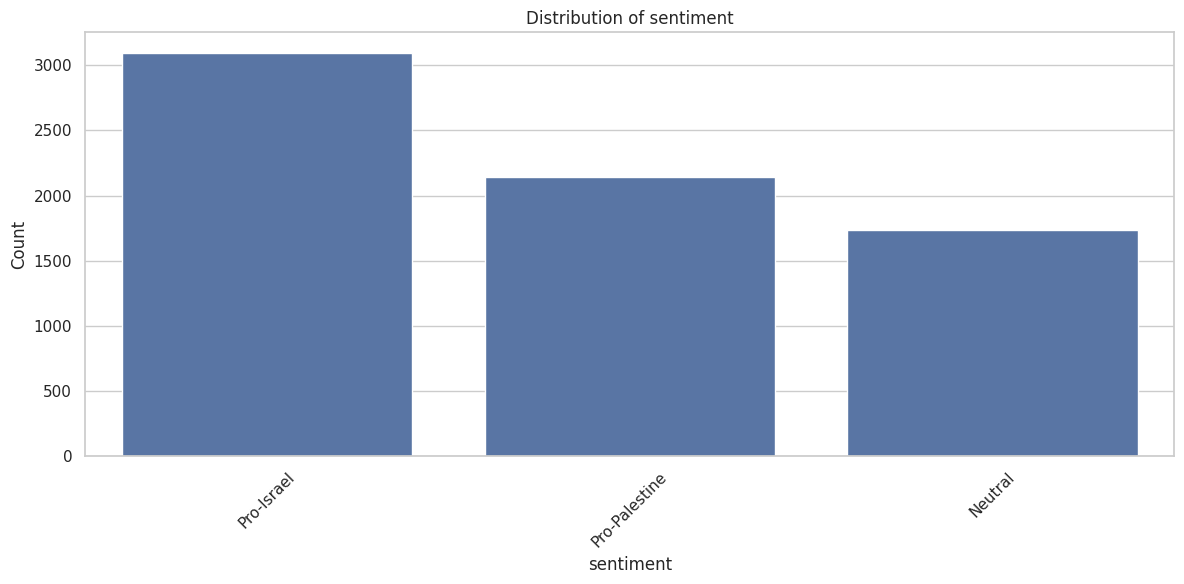

In [12]:
plot_column_distribution(train_df, "sentiment")

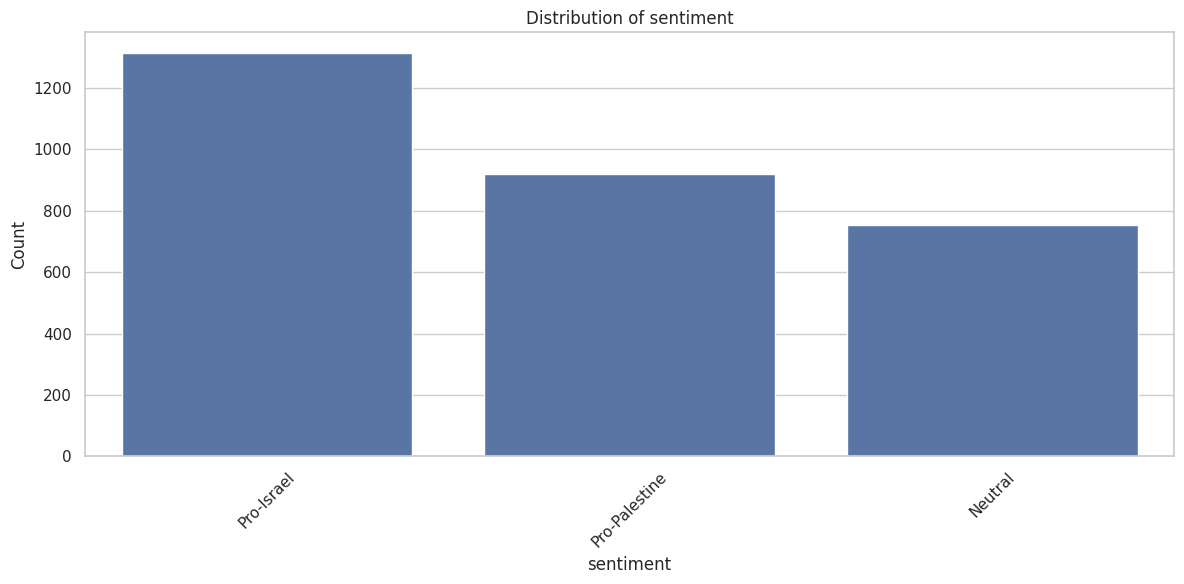

In [13]:
plot_column_distribution(test_df, "sentiment")

In [14]:
# save the new parquet file
parquet_output_path = Path("data/redditconflict_train.parquet")
train_df.to_parquet(parquet_output_path, index=False)
parquet_output_path = Path("data/redditconflict_test.parquet")
test_df.to_parquet(parquet_output_path, index=False)